# Gas Discharge & Stellar Feedback-driven Outflows (Part 1 /3):
## Kinematic and Other Observations (v.2)
`-- Leo Lonzarich, 20 October 2021 // [Updated 4-4-22] --`


### Table of Contents
- [Analysing Discharged Gas](#compare)
    - [Comparing Radial Positions](#radialpositions)
    - [Comparing Radial Velocities](#velocities)
    - [Comparing Exit Angles](#ejectedexit)
    - [Comparing Temperatures](#comptemperature)
- [The Proving Grounds](#proving)


### General Comments on Data/Contents of this Noteboook
- Repeat occurance of particle ids (`pids`) in data sets below typically a result of particle being discharged/accreted more than once. (Checking timesteps of repeated pid should verify this.)


- The datasets: (each logs the properties (stored in `keys`) for their respective particles for the specified point relative to their differentiating event.)

    1. **Ejected/Expelled Data (from H. Akins):**
        - *Ejected*: Gas particles that have been removed from their respective satellite galaxy's disk to the halo. (Properties for **timestep after ejection**.)
        - *Expelled*: Gas particles (within the disk or halo of their respective satellite galaxy) that have been removed beyond the virial radius of their satellite; that is, all gas particles removed to the field. (Again, properties given for **timestep after expullsion**.)
        <br><br>
    2. **Discharge Data (From L. Lonzarich):**
        - *Discharged*: Gas particles that have been removed from the disk of their respective satellite galaxy. This includes both gas moved to halo, and that moved beyond the virial radius. (Properties given for **timestep after discharge event**.)
        - *Predischarged*: A collection of the same particles in *Discharged*, but instead giving the properties of each particle prior to their discharge event (thereby allowing pre- and post-discharge comparisons).
        - *Heated*: Gas particles in *Discharged* that experienced supernova(e) heating (functionally, their 'cooling' was turned off) in the timestep prior to being discharged. (Note: this dataset can be also be obtained by selecting particles from *Discharged* with `sneHeated==True`.)
        - *Preheated*: Similar to *Predischarged*; Consists of the same particles in *Heated*, but with properties of each particle for the timestep prior to discharge.
        <br><br>
        - *Accreted*: Gas particles in the halo or beyond the virial radius of a satellite that are accreted onto the satellite's disk. (Properties given for **timestep following accretion event**.) Note that this includes particles that were previously discharged from the satellite's disk, and those that were not. 
        - *Reaccreted*: A subset of *Accreted*; Gas particles in the halo or beyond the virial radius of a satellite as a result of a prior discharge event that are reaccreted onto the satellite's disk. (Properties given for **timestep following reaccretion event**.)


    
    
- Noteworthy measures and their units (see `KEYS.md` for further explanation of data keys):
    - *Time* is in Gigayears $(Gyrs)$.
    - *Distances* in kiloparsecs $(kpc)$.
    - *Velocities* in kilometers per second $(km \ s^{-1})$.
    - *Masses* in solar masses $(M_{sol})$.
    - *Gravitational Constant* G in ($kpc\ km^2\ M_{sol}^{-1}\ s^{-2})$

In [1]:
import numpy as np
import pylab
import pynbody
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

from analysis import * 
from compiler import *

In [2]:
# check to ensure latex works in string labels.
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [3]:
# rootPath is specified in `base.py` and can be further modified as needed to match directories. 
path = f'{rootPath}Stellar_Feedback_Code/SNeData/discharged_particles.hdf5'
with pd.HDFStore(path) as hdf:
    keys = np.array([h[1:] for h in hdf.keys()])

# listing dwarf galaxies of simulations that are viable for study (gaseous, satellite, etc).
print(len(keys), f'Available Keys:\n', *keys)

19 Available Keys:
 h148_12 h148_249 h148_251 h148_27 h148_282 h148_34 h148_38 h148_55 h148_65 h229_14 h229_18 h229_20 h229_22 h229_49 h242_21 h242_38 h242_69 h329_117 h329_29


## The 'Discharged' Gas: Comparing Heated Vs. All <a class="anchor" id="compare"></a>

____
____

We are here concerned only with particles that leave the disk of a satellite galaxy; whether they are removed to the satellite halo or beyond matters not. To avoid confusion with the terminology used in other areas of this research, we coin the following terms which will also correspond to pre-calculated datasets:

- *Discharged*: Gas particles that have been removed from the disk of their respective satellite galaxy. This includes both gas moved to halo, and that moved beyond the virial radius. (Properties given for **timestep after discharge event**.)
- *Predischarged*: A collection of the same particles in *Discharged*, but instead giving the properties of each particle prior to their discharge event (thereby allowing pre- and post-discharge comparisons).
- *Heated*: Gas particles in *Discharged* that experienced supernova (SN) heating (functionally, their 'cooling' was turned off) in the timestep prior to being discharged. (Note: this dataset can be also be obtained by selecting particles from *Discharged* with `sneHeated==True`.)
- *Preheated*: Similar to *Predischarged*; Consists of the same particles in *Heated*, but with properties of each particle for the timestep prior to discharge.
<br><br>
- *Accreted*: Gas particles in the halo or beyond the virial radius of a satellite that are accreted onto the satellite's disk. (Properties given for **timestep following accretion event**.) Note that this includes particles that were previously discharged from the satellite's disk, and those that were not. 
- *Reaccreted*: A subset of *Accreted*; Gas particles in the halo or beyond the virial radius of a satellite as a result of a prior discharge event that are reaccreted onto the satellite's disk. (Properties given for **timestep following reaccretion event**.)

Unless otherwise noted, 'ejection' and 'expulsion' will be used for their denotative meaning. Finally, define

$$
M_{dsrg}
$$

to be the collective mass of all discharged particles --- functionally, the sum of the masses of every gas particle in the *discharged* dataset. Similarly, let

$$
M_{sne}
$$

be the total mass of all SN-heated, discharged particles in the *heated* dataset. We will use this to both normalize our data, and determine what fractions of reaccreted particles (in terms of mass) adhere to particular critera.

### General Properties of Sims and Selected Satellites

In [4]:
predischarged, hot_predischarged, discharged = read_all_discharged()
all_accreted, reaccreted = read_accreted()

> Returning (predischarged, discharged, hot_predischarged) for all satellites <
> Returning (accreted, reaccreted) for all satellites <


In [5]:
# finding number of particles per simulation; Sandra (h148), 
# Ruth (h229), Sonia (h242), Elena (h329)

keys = ['h148_12','h148_27','h148_34','h148_38','h148_55','h148_65','h148_249',
        'h148_251','h148_282','h229_14','h229_18','h229_20','h229_22',
        'h229_49','h242_21','h242_38','h242_69','h329_29','h329_117']

dis_h148 = pd.DataFrame()
dis_h229 = pd.DataFrame()
dis_h242 = pd.DataFrame()
dis_h329 = pd.DataFrame()

for key in keys:
    sim = str(key[0:4])
    
    if sim=='h148':
        dis_h148 = dis_h148.append(discharged[discharged.key==key])
        continue
    elif sim=='h229':
        dis_h229 = dis_h229.append(discharged[discharged.key==key])
        continue
    elif sim=='h242':
        dis_h242 = dis_h242.append(discharged[discharged.key==key])
        continue
    elif sim=='h329':
        dis_h329 = dis_h329.append(discharged[discharged.key==key])
        continue
    else: 
        print('err')

In [6]:
# len(dis_h148)+len(dis_h229)+len(dis_h242)+len(dis_h329), len(discharged)

len(dis_h148), len(dis_h229), len(dis_h242), len(dis_h329)

(121738, 39113, 27933, 3332)

In [7]:
# finding min/max masses of satellites.
print('Min Mvir: ', discharged.sat_Mvir.min()*10**-8, '\n Max Mvir: ',
      discharged.sat_Mvir.max()*10**-8)

Min Mvir:  18.182133283172238 
 Max Mvir:  99.60553306095717


### Comparing Radial Positions <a class="anchor" id="radialpositions"></a>

For this treatment, we look specifically at radial positions for 1) gas that has been 'discharged' from select satellite galaxy's disks, 2) the subset of 'discharged gas that was SNe-heated (abreviated by 'heated'), and 3) 'pre-discharged' gas --- that is, the 'discharged' gas in the timestep before it is ejected.

In [8]:
predischarged, hot_predischarged, discharged = read_all_discharged()
all_accreted, reaccreted = read_accreted()

# gas SN-heated/unheated prior to discharge.
hot = discharged[discharged['snHeated']==True]  # heated.
cold = discharged[discharged['snHeated']==False]  # unheated.

> Returning (predischarged, discharged, hot_predischarged) for all satellites <
> Returning (accreted, reaccreted) for all satellites <


In [9]:
# quick calc. for ubiquitous weights in plotting.
@pynbody.derived_array
def wt(*gas):
    if len(gas) == 1:
        return np.array(gas[0]['mass'] / gas[0]['mass'].sum())
    
    else:
        return np.array(gas[0]['mass'] / gas[1]['mass'].sum())['mass'].sum()

In [10]:
# cartesian position,velocity components for gas relative to satellite.
# `pre` and `post` refer to pre and post discharge.
pre_pos = np.array([predischarged.x, predischarged.y, predischarged.z]).T
pre_vel = np.array([predischarged.vx, predischarged.vy, predischarged.vz]).T

preHot_pos = np.array([hot_predischarged.x, hot_predischarged.y,
                       hot_predischarged.z]).T
preHot_vel = np.array([hot_predischarged.vx, hot_predischarged.vy,
                       hot_predischarged.vz]).T

post_pos = np.array([discharged.x, discharged.y, discharged.z]).T
post_vel = np.array([discharged.vx, discharged.vy, discharged.vz]).T

postHot_pos = np.array([hot.x, hot.y, hot.z]).T
postHot_vel = np.array([hot.vx, hot.vy, hot.vz]).T

reac_pos = np.array([reaccreted.x, reaccreted.y, reaccreted.z]).T
reac_vel = np.array([reaccreted.vx, reaccreted.vy, reaccreted.vz]).T


# calculating radial position relative to satellite.
pre_rpos = np.sqrt(np.sum(pre_pos**2, axis=1))
preHot_rpos = np.sqrt(np.sum(preHot_pos**2, axis=1))
post_rpos = np.sqrt(np.sum(post_pos**2, axis=1))
postHot_rpos = np.sqrt(np.sum(postHot_pos**2, axis=1))
reac = np.sqrt(np.sum(reac_pos**2, axis=1))

# radial velocities for gas particles relative to satellite.
pre_rvel = np.sum(pre_pos * pre_vel, axis=1) / np.sqrt(np.sum(pre_pos**2, axis=1))
preHot_rvel = np.sum(preHot_pos * preHot_vel, axis=1) / np.sqrt(np.sum(preHot_pos**2,
                                                        axis=1))
post_rvel = np.sum(post_pos * post_vel, axis=1) / np.sqrt(np.sum(post_pos**2, axis=1))
postHot_rvel = np.sum(postHot_pos * postHot_vel,
                      axis=1) / np.sqrt(np.sum(postHot_pos**2, axis=1))
reac_rvel = np.sum(reac_pos * reac_vel, axis=1) / np.sqrt(np.sum(reac_pos**2, axis=1))

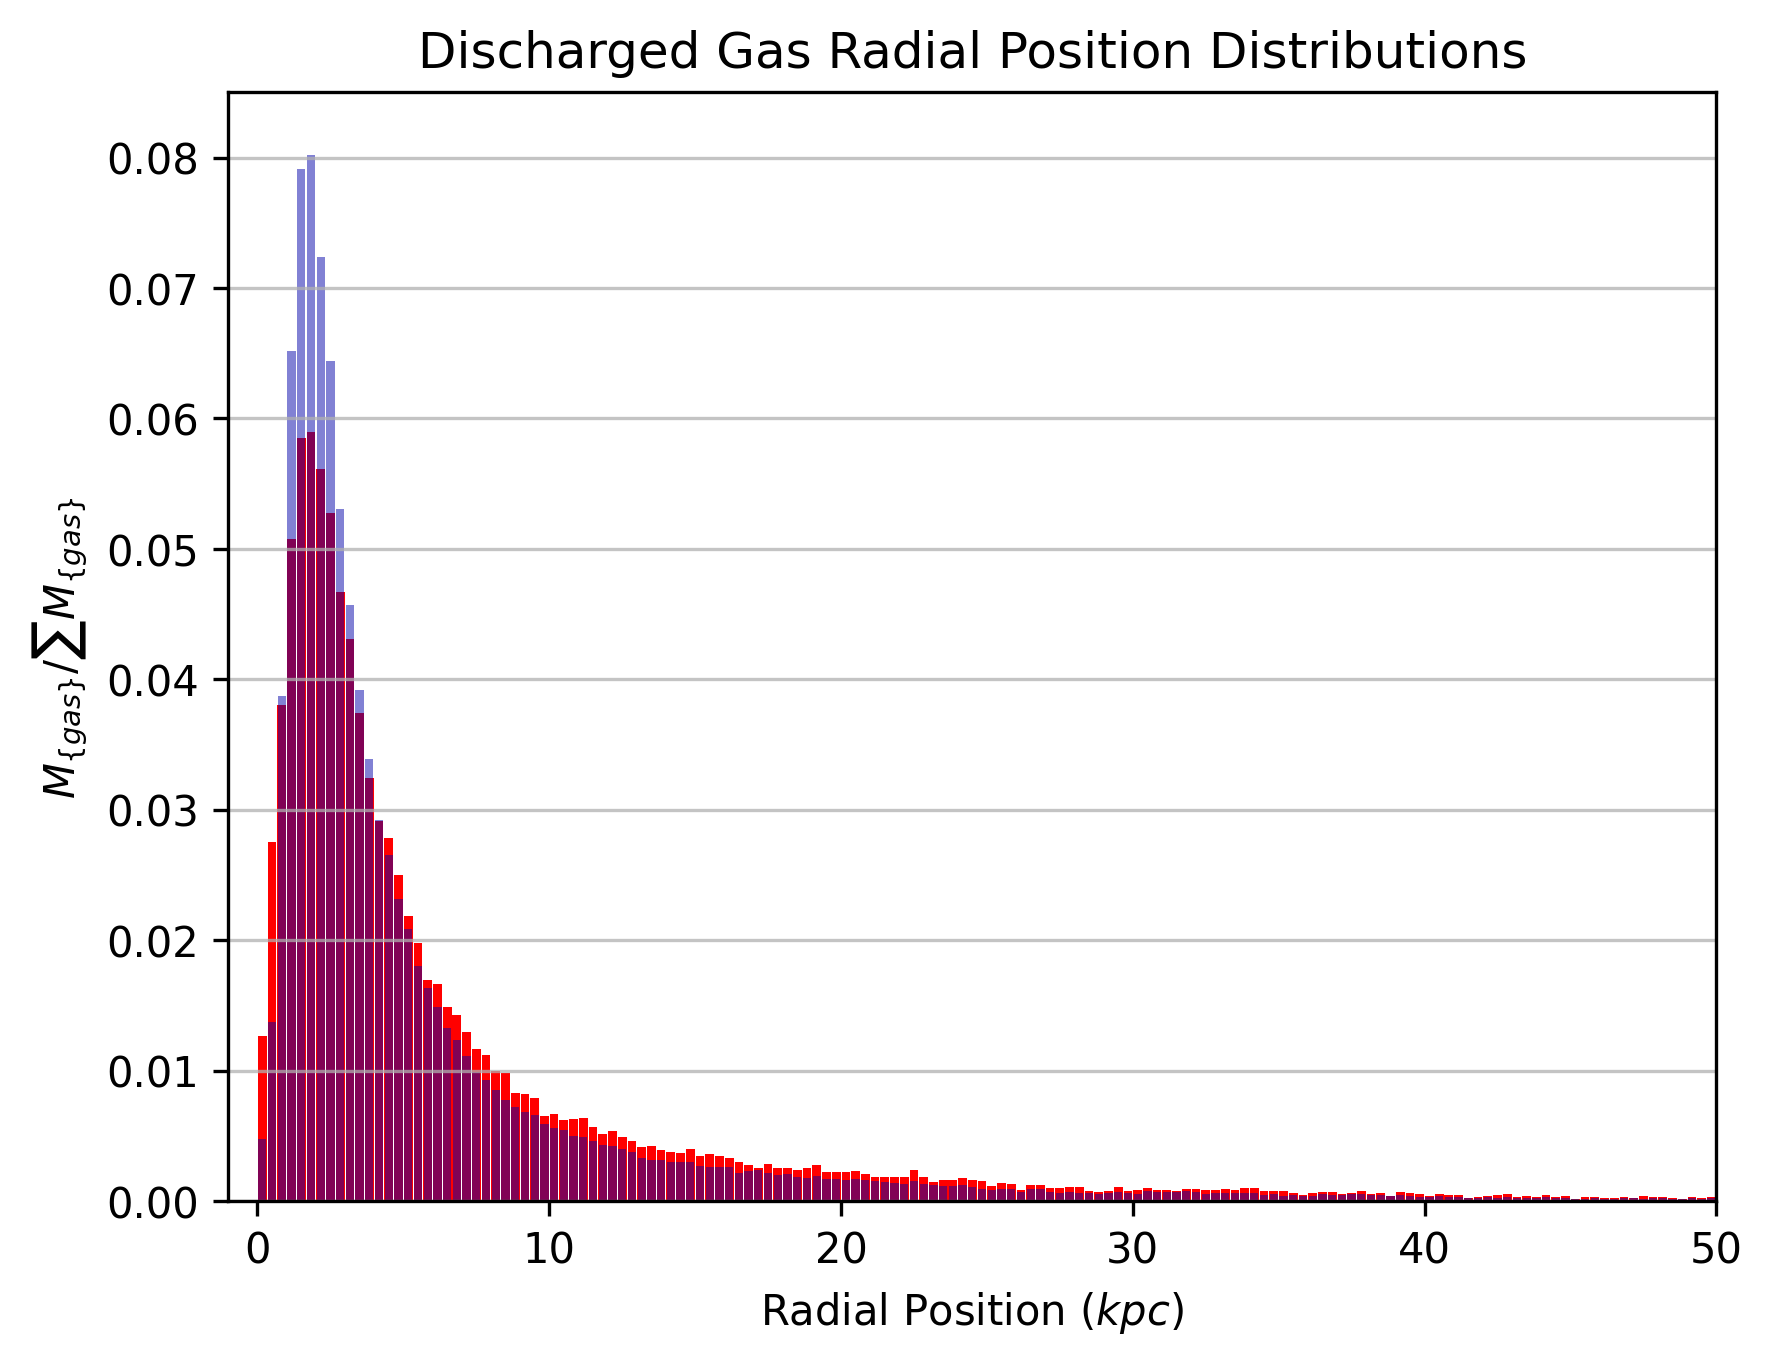

In [57]:
# Position histograms for all gas, and heated gas.
bins = 150

plt.figure(dpi=300)
plt.hist(post_rpos, bins=bins, weights=wt(discharged), color='#0504aa', alpha=0.5,
         rwidth=0.85, label='Discharged', zorder=-1, range=(0, 50))

plt.hist(postHot_rpos, bins=bins, weights=wt(hot), color='red', alpha=1,
         rwidth=0.90, label='SN-heated', zorder=-1000, range=(0, 50))

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Radial Position $(kpc)$')
plt.ylabel('$M_{\{gas\}} / \sum M_{\{gas\}}$')
plt.title('Discharged Gas Radial Position Distributions')

plt.xlim(-1,50)
plt.ylim(0,0.085)

plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=10)



plt.show()

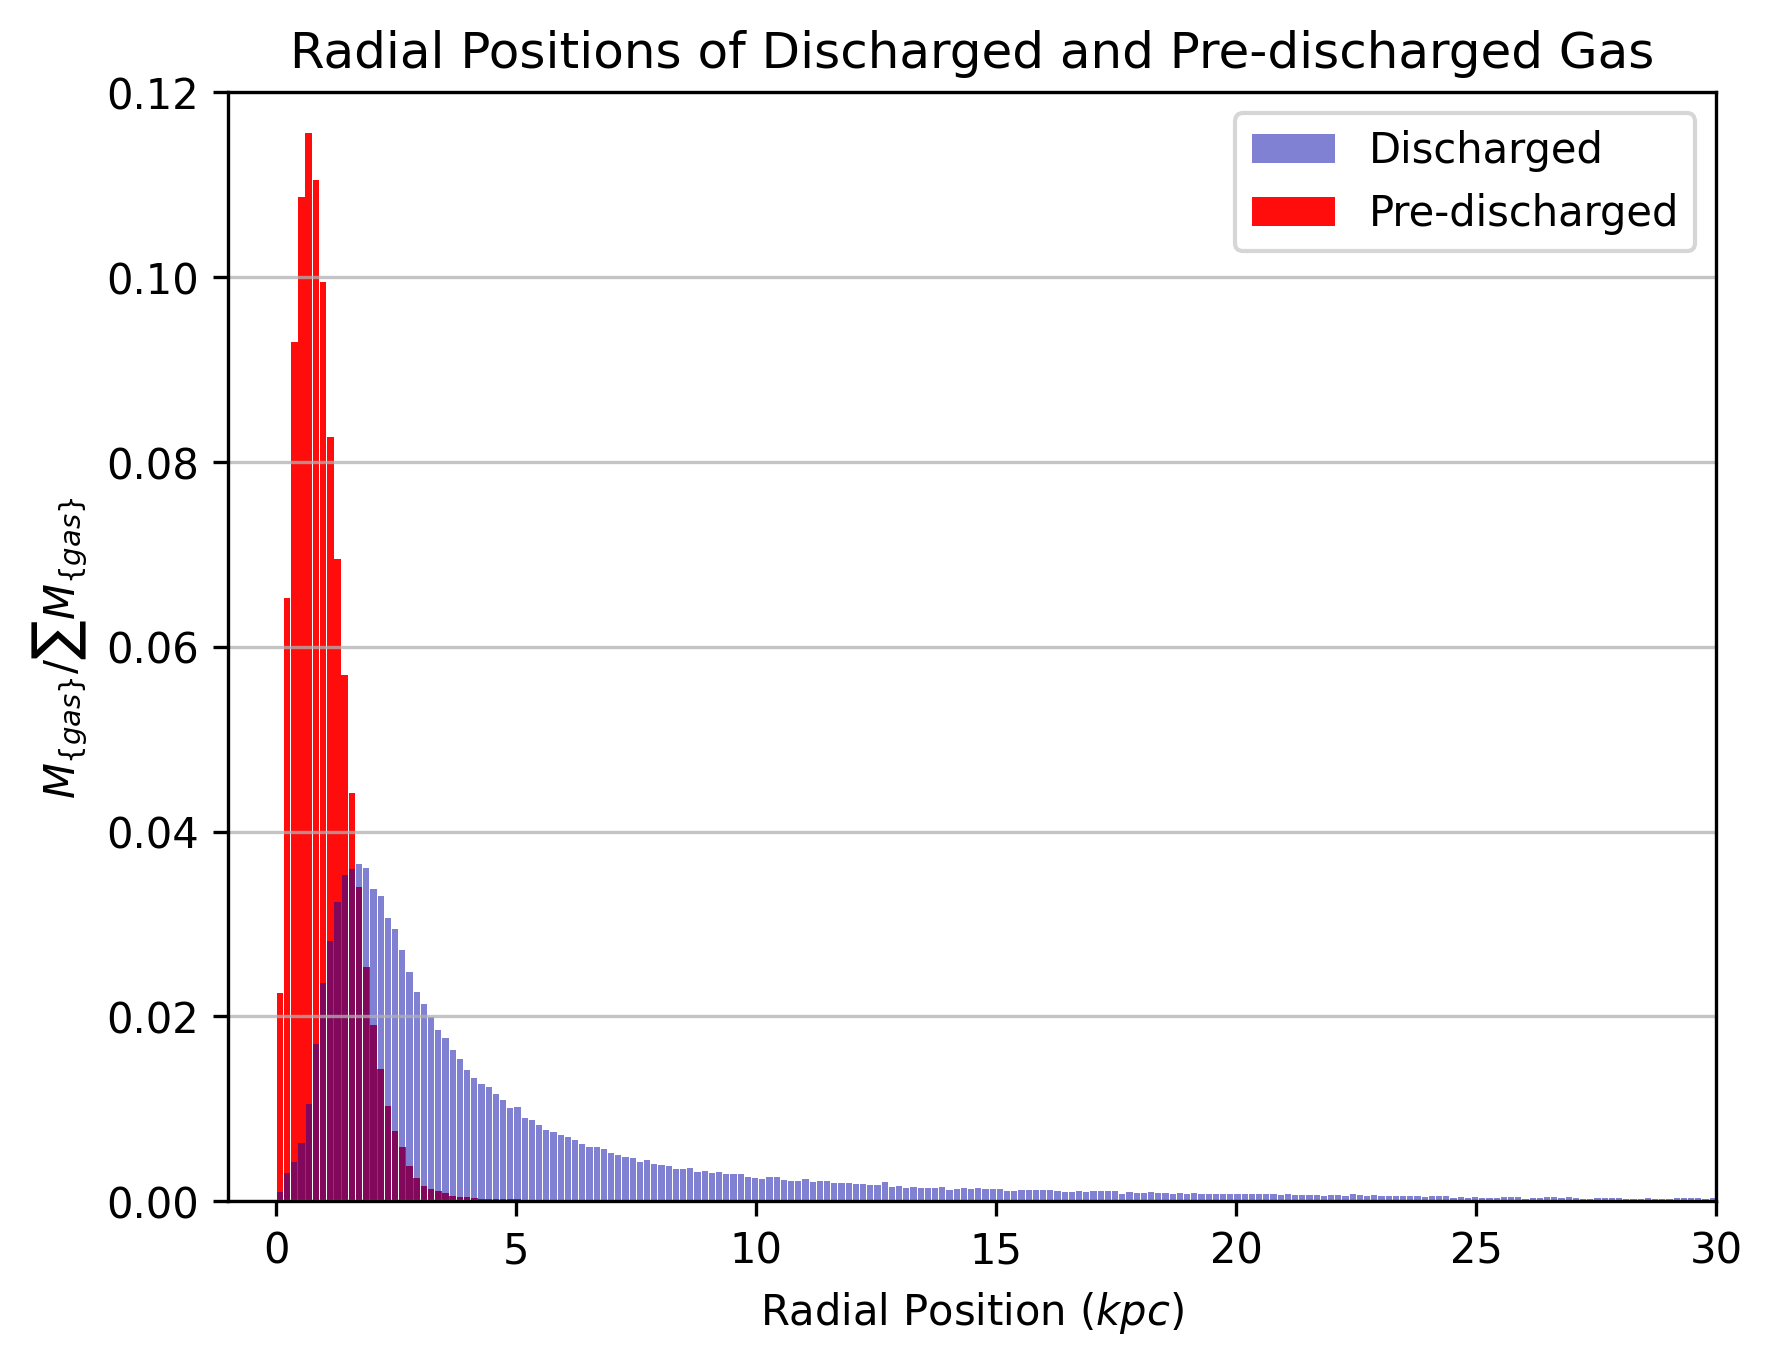

In [59]:
# Position  histograms for all gas, and heated gas.
bins = 200

plt.figure(dpi=300)
plt.hist(post_rpos, bins=bins, weights=wt(discharged), color='#0504aa', alpha=0.5, rwidth=0.85,\
         label='Discharged', zorder=-1, range=(0, 30))
plt.hist(pre_rpos, bins=bins, weights=wt(predischarged), color='red', alpha=0.95, rwidth=0.9,\
         label='Pre-discharged', zorder=-1000, range=(0, 30))


plt.grid(axis='y', alpha=0.75)
plt.xlabel('Radial Position $(kpc)$')
plt.ylabel('$M_{\{gas\}} / \sum M_{\{gas\}}$')

plt.title('Radial Positions of Discharged and Pre-discharged Gas')

plt.xlim(-1,30)
plt.ylim(0,0.12)

plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=10)

plt.legend(loc='upper right')
plt.show()

We plot the histograms as cleaner line plots below to better-observe the trends in positions for the different sets of data.

Further, in these plots, we also include a horizontal dashed line representing the radial position of the 'radial center of mass,' or 'COM,' for each data set.

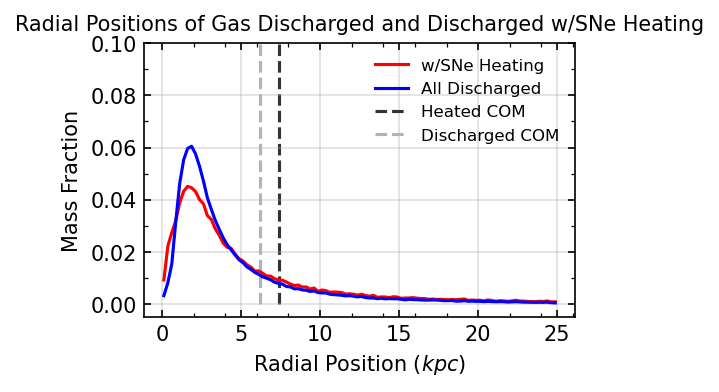

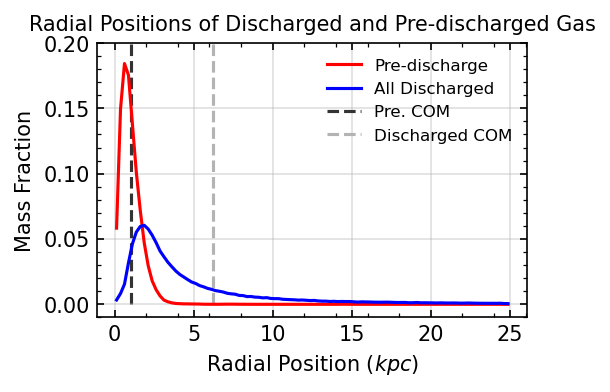

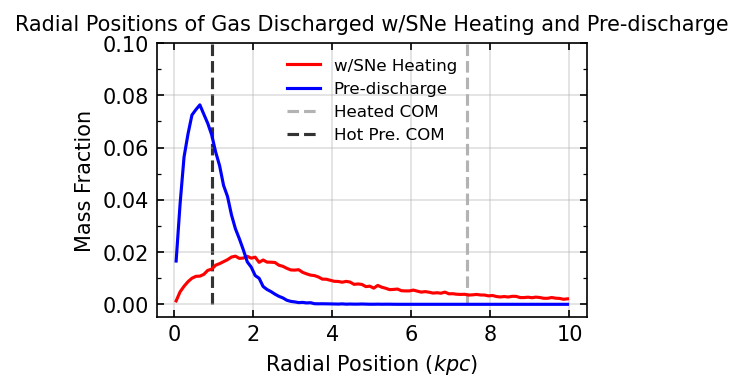

In [71]:
# picking out SN-heated, unheated gas.
hot = discharged[discharged.snHeated==True]
cold = discharged[discharged.snHeated==False]


##### plotting discharged vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=300, figsize=(3.5,2.5), constrained_layout=True)


# applying conditional on distances of gas from center of satellite.
y1, x = np.histogram(heated_rpos, bins=bins, weights=wt(heated), range=(0, 25))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='w/SN Heating', c='r')

y1, x = np.histogram(all_rpos, bins=bins, weights=wt(discharged), range=(0, 25))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')

com1 = heated_rpos.mean()
com2 = all_rpos.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Heated COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Discharged COM')




# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Positions of Gas Discharged and Discharged w/SN Heating', fontsize='medium')
ax.set_xlabel(r'Radial Position $(kpc)$')
ax.set_ylabel('Mass Fraction')
# ax.set_xlim(0,30)
ax.set_ylim(-0.005,0.1)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

# ticks = ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y*1))
# ax.yaxis.set_major_formatter(ticks)

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

plt.savefig('plots/theta_allsats_stacked.pdf')




##### plotting discharged vs. pre-discharged gas #####
fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
y1, x = np.histogram(pre_rpos, bins=bins, weights=predischarged.weight, range=(0, 25))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Pre-discharge', c='r')

y1, x = np.histogram(all_radpos, bins=bins, weights=discharged.weight, range=(0, 25))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')

com1 = pre_radpos.mean()
com2 = all_radpos.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Pre. COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Discharged COM')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Positions of Discharged and Pre-discharged Gas', fontsize='medium')
ax.set_xlabel(r'Radial Position $(kpc)$')
ax.set_ylabel('Mass Fraction')
# ax.set_xlim(0,30)
ax.set_ylim(-0.01,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

plt.savefig('plots/theta_allsats_stacked.pdf')

plt.show()


# ##### plotting pre-discharge heated vs. heated gas #####
# fig, ax = plt.subplots(1,1,dpi=150, figsize=(3.5,2.5), constrained_layout=True) # change to dpi=300 for printout.


# # applying conditional on distances of gas from center of satellite; collecting frequency and bin information for plot.
# y1, x = np.histogram(heated_radpos, bins=bins, weights=heated.weight, range=(0, 10))
# bincenters = 0.5*(x[1:] + x[:-1])
# ax.plot(bincenters, y1, label='w/SNe Heating', c='r')

# y1, x = np.histogram(preheated_radpos, bins=bins, weights=preheated.weight, range=(0, 10))
# bincenters = 0.5*(x[1:] + x[:-1])
# ax.plot(bincenters, y1, label='Pre-discharge', c='b')


# # plot mean position of mass.
# com1 = heated_radpos.mean()
# com2 = preheated_radpos.mean()
# ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Heated COM')
# ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Hot Pre. COM')


# # labels, axis scaling, etc.
# ax.legend(frameon=False, fontsize='8')

# ax.set_title('Radial Positions of Gas Discharged w/SNe Heating and Pre-discharge', fontsize='medium')
# ax.set_xlabel(r'Radial Position $(kpc)$')
# ax.set_ylabel('Mass Fraction')
# # ax.set_xlim(0,10)
# ax.set_ylim(-0.005,0.1)

# ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(2))
# ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

# ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
# ax.tick_params(direction='in',which='both',right=True,top=True)
# ax.grid(alpha=0.4, zorder=-1000)

# # plt.savefig('plots/theta_allsats_stacked.pdf')

In [10]:
# finding mean positions of mass.
pre_com = pre_radpos.mean()
hot_pre_com = hot_pre_radpos.mean()
all_com = all_radpos.mean()
hot_com = hot_radpos.mean()

# computing difference in COMs for the above three graphs in order.
print(all_com-hot_com), print(all_com-pre_com), print(hot_com-hot_pre_com);

-1.2044551539314234
5.193728213349389
6.393020256511232


In these above three plots, it is easy to mistake the that the distributions of the different gas selections are nearly identical since all appear to peak near 0 kpc. However, when we also plot indicators locating the averaged radial position (which is here termed the 'radial center of mass' or COM because we analyse a percentage distribution of mass), it becomes clear that there are noteworthy differences in how far each chosen set of gas is from the satellite centers.

In the cases above, it turns out that the radial centers of mass differ as follows:

- The total of discharged gas is ejected $\sim 11.34 \ kpc$ farther than SNe-discharged gas on its own;

- The total of discharged gas is ejected $\sim 14.07 \ kpc$ out from its original location in the satellite disks;

- The SNe-discharged gas moves $\sim 3.06 \ kpc$ out from its original position in the satellite disks (which is not far --- likely just beyond the edge of the disk into the halo).



### Comparing Radial Velocities <a class="anchor" id="velocities"></a>

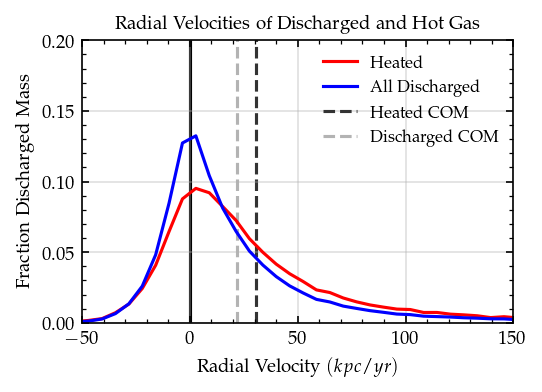

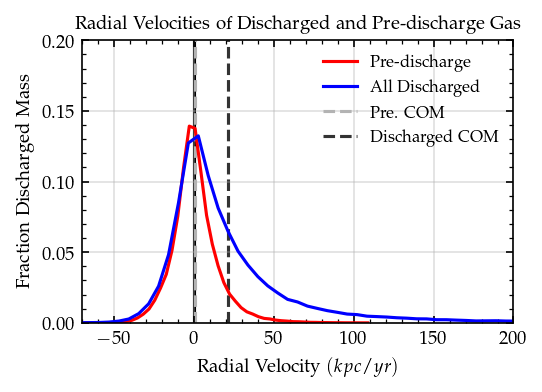

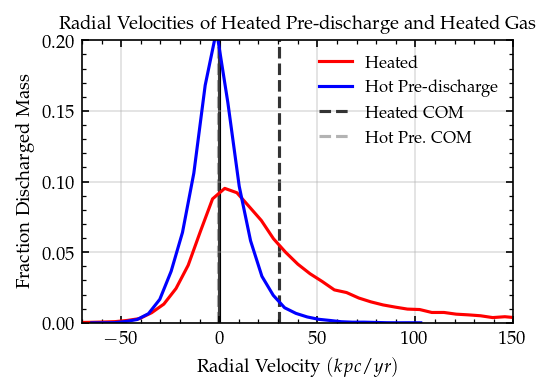

In [17]:
##### plotting discharged vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1, 1, dpi=300, figsize=(3.5,2.5), constrained_layout=True)

y1, x = np.histogram(hot_radvel, bins=bins, weights=wt(hot))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Heated', c='r')

y1, x = np.histogram(all_radvel, bins=bins, weights=discharged.weight)
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='All Discharged', c='b')


# plot mean position of mass.
com1 = hot_radvel.mean()
com2 = all_radvel.mean()
ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Heated COM')
ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Discharged COM')

# plot horizontal line for zero velocity.
plotrange = [0,0.33]
ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-1)


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Radial Velocities of Discharged and Hot Gas', fontsize='medium')
ax.set_xlabel(r'Radial Velocity $(kpc/yr)$')
ax.set_ylabel('Fraction Discharged Mass')
ax.set_xlim(-50,150)
ax.set_ylim(0,0.2)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)
ax.grid(alpha=0.4, zorder=-1000)

# plt.savefig('plots/theta_allsats_stacked.pdf')



##### plotting discharged vs. pre-discharged gas #####
# fig, ax = plt.subplots(1, 1, dpi=300, figsize=(3.5,2.5), constrained_layout=True)

# y1, x = np.histogram(pre_radvel, bins=50, weights=predischarged.weight)
# bincenters = 0.5*(x[1:] + x[:-1])
# ax.plot(bincenters, y1, label='Pre-discharge', c='r')

# y1, x = np.histogram(all_radvel, bins=100, weights=discharged.weight)
# bincenters = 0.5*(x[1:] + x[:-1])
# ax.plot(bincenters, y1, label='All Discharged', c='b')


# # plot mean position of mass.
# com1 = pre_radvel.mean()
# com2 = all_radvel.mean()
# ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Pre. COM')
# ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Discharged COM')

# # plot horizontal line for zero velocity.
# plotrange = [0,0.33]
# ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-10000)

# # labels, axis scaling, etc.
# ax.legend(frameon=False, fontsize='8')

# ax.set_title('Radial Velocities of Discharged and Pre-discharge Gas', fontsize='medium')
# ax.set_xlabel(r'Radial Velocity $(kpc/yr)$')
# ax.set_ylabel('Fraction Discharged Mass')
# ax.set_xlim(-70,200)
# ax.set_ylim(0,0.2)

# ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
# ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

# ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
# ax.tick_params(direction='in',which='both',right=True,top=True)
# ax.grid(alpha=0.4, zorder=-1000)

# # plt.savefig('plots/theta_allsats_stacked.pdf')



# ##### plotting pre-discharge heated vs. heated gas #####
# bins = 100
# fig, ax = plt.subplots(1, 1, dpi=300, figsize=(3.5,2.5), constrained_layout=True)

# y1, x = np.histogram(hot_radvel, bins=100, weights=heated.weight)
# bincenters = 0.5*(x[1:] + x[:-1])
# ax.plot(bincenters, y1, label='Heated', c='r')

# y1, x = np.histogram(hot_pre_radvel, bins=30, weights=hot_predischarged.weight)
# bincenters = 0.5*(x[1:] + x[:-1])
# ax.plot(bincenters, y1, label='Hot Pre-discharge', c='b')


# # plot mean position of mass.
# com1 = hot_radvel.mean()
# com2 = hot_pre_radvel.mean()
# ax.plot([com1,com1],[0,0.3],linestyle='--',color='0.2',zorder=-1, label='Heated COM')
# ax.plot([com2,com2],[0,0.3],linestyle='--',color='0.7',zorder=-1, label='Hot Pre. COM')

# # plot horizontal line for zero velocity.
# plotrange = [0,0.33]
# ax.plot([0,0],[0,0.3],linestyle='solid',color='black',zorder=-1)


# # labels, axis scaling, etc.
# ax.legend(frameon=False, fontsize='8')

# ax.set_title('Radial Velocities of Heated Pre-discharge and Heated Gas', fontsize='medium')
# ax.set_xlabel(r'Radial Velocity $(kpc/yr)$')
# ax.set_ylabel('Fraction Discharged Mass')
# ax.set_xlim(-70,150)
# ax.set_ylim(0,0.2)

# ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
# ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

# ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
# ax.tick_params(direction='in',which='both',right=True,top=True)
# ax.grid(alpha=0.4, zorder=-1000)

# # plt.savefig('plots/theta_allsats_stacked.pdf')
# plt.show()

The radial centers of mass are again included to better detail the velocity at which the bulk of each gas group is traveling.

All particles are moving out/into the the center of the satellites nearly uniformly, with slight bias towards exiting, as we should expect.

The second plot is particcularly telling of the validity in data collection --- that is, the bulk of gas, before being discharged, has a radial velocity of 0 $km/s$ relative to the center of the satellite galaxies.

### Comparing Exit Angles <a class="anchor" id="ejectedexit"></a>


In [13]:
predischarged, hot_predischarged, discharged = read_all_discharged()
all_accreted, reaccreted = read_accreted()

> Returning (predischarged, discharged, hot_predischarged) for all satellites <
> Returning (accreted, reaccreted) for all satellites <


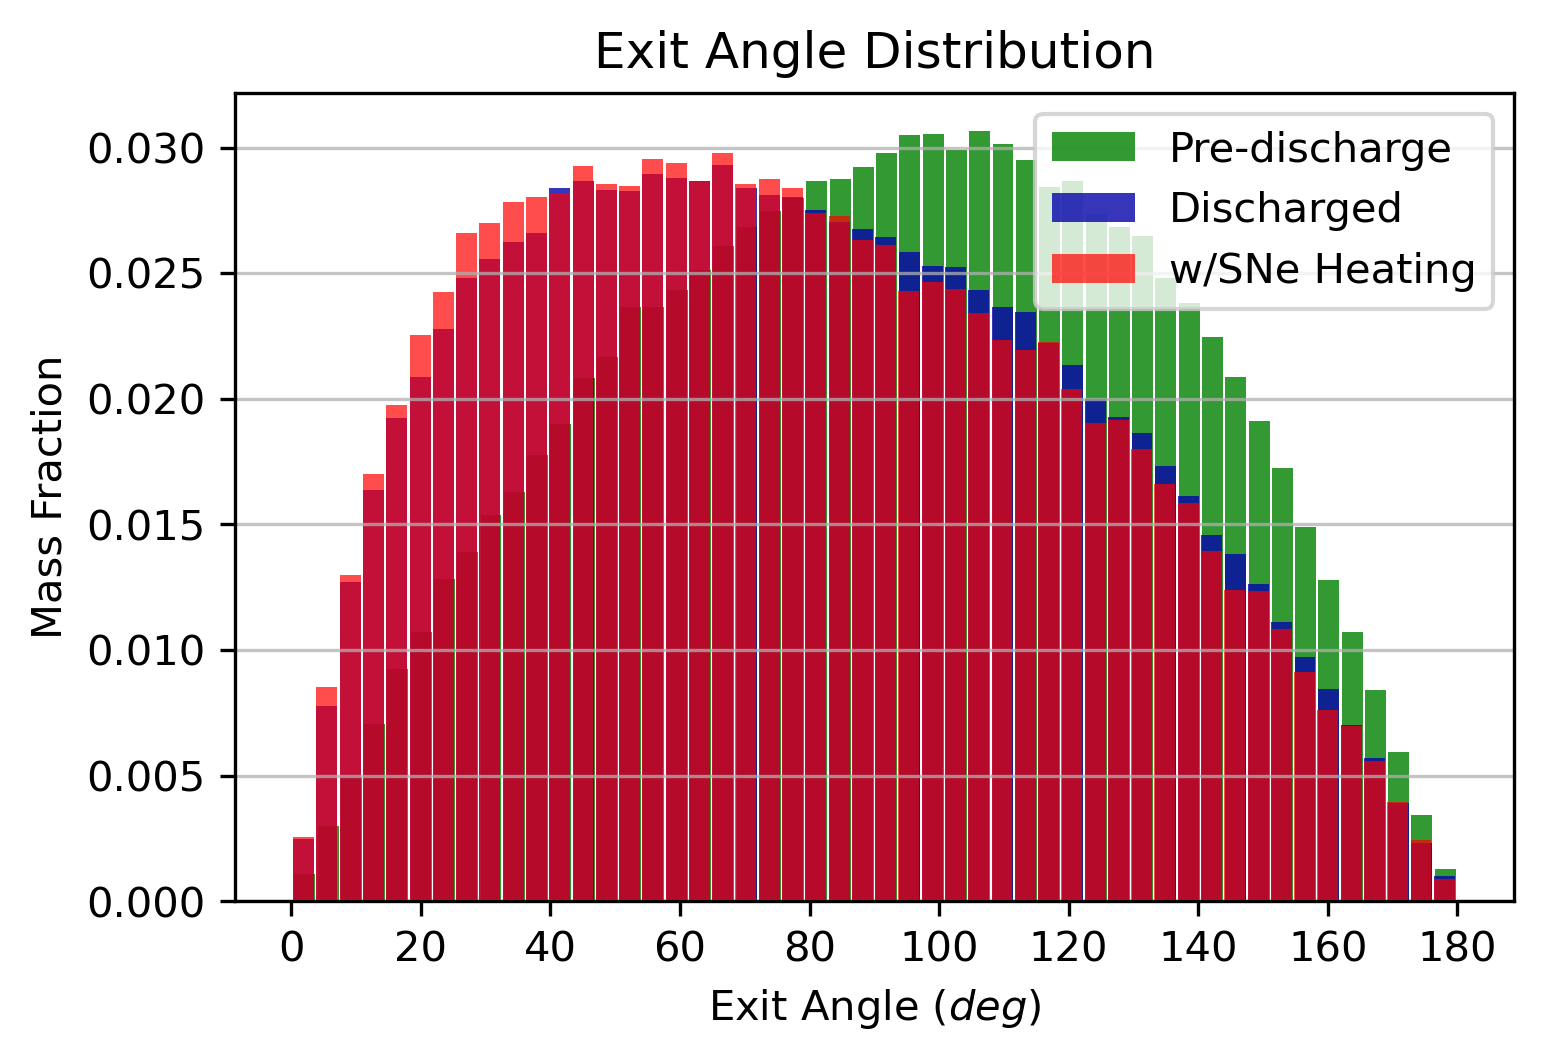

In [17]:
# pulling exit angles.
pre_angle = predischarged.angle
all_angle = discharged.angle
hot_angle = heated.angle

# exit angle histograms for pre-discharged, and discharged, SNe-heated gas.
plt.figure(dpi=300, figsize=(5.5,3.5))
plt.hist(pre_angle, bins=50, weights=predischarged.weight, color='green', alpha=0.8, rwidth=0.9, label='Pre-discharge')
plt.hist(all_angle, bins=50, weights=discharged.weight, color='#0504aa', alpha=0.8, rwidth=0.9, label='Discharged')
plt.hist(hot_angle, bins=50, weights=heated.weight, color='red', alpha=0.7, rwidth=.9, label='w/SNe Heating')


plt.grid(axis='y', alpha=0.75)
plt.xlabel('Exit Angle ($deg$)')
plt.ylabel('Mass Fraction')
plt.title('Exit Angle Distribution')

# leg1 = plt.legend(title='Gas', loc='upper left')
# leg1._legend_box.align = 'right'
# legend(loc=(0.26,0.74))

#plt.xlim(0,16)
#plt.ylim(0,0.085)

plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=10)


plt.legend(loc='upper right')
plt.show()

In [11]:
# constructing bins for exit angle histograms.
N = 30
theta1,theta2 = 0,0 # initialize
bins = np.array([theta1]) 
while theta2 < 3.14:
    theta2 = np.arccos(np.cos(theta1)-(2/N))
    bins = np.append(bins,theta2)
    theta1 = theta2

bins = bins*180/np.pi
bincenters = 0.5*(bins[1:]+bins[:-1])

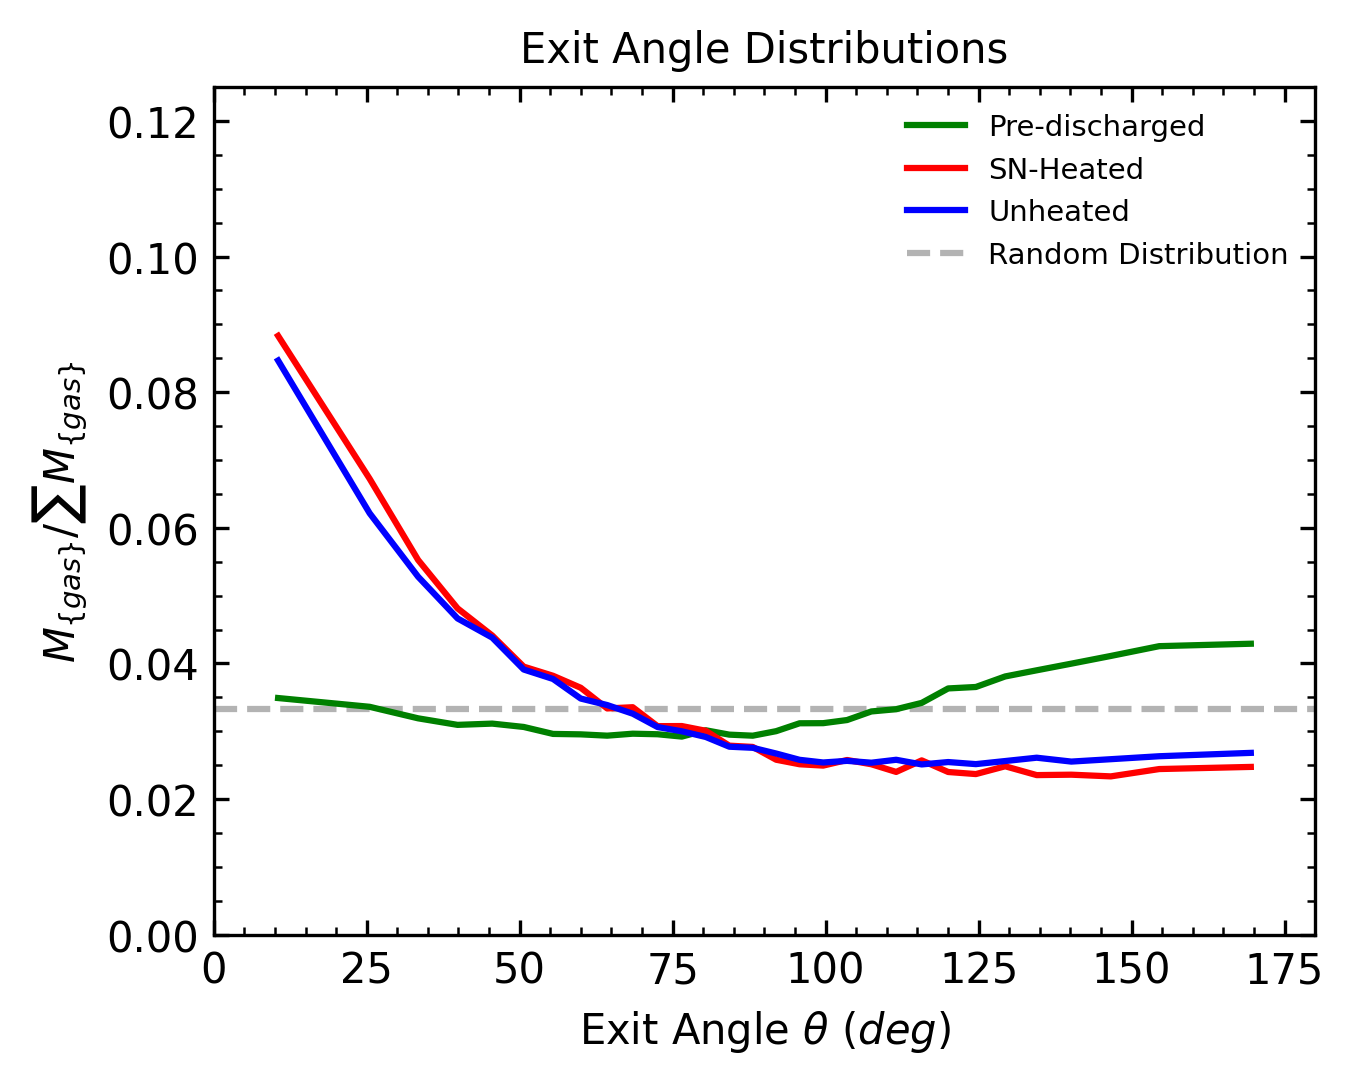

In [12]:
hot = discharged[discharged.snHeated==True]
cold = discharged[discharged.snHeated==False]


fig, ax = plt.subplots(1,1,dpi=300, figsize=(4.5,3.5), constrained_layout=True) 

# applying conditional on distances of gas from center of satellite; collecting 
# frequency and bin information for plot.
y1, bins = np.histogram(predischarged.angle, bins=bins, weights=wt(predischarged))
ax.plot(bincenters, y1, label='Pre-discharged', c='green')

y2, bins = np.histogram(hot.angle, bins=bins, weights=wt(hot))
ax.plot(bincenters, y2, label='SN-Heated', c='r')

y3, bins = np.histogram(cold.angle, bins=bins, weights=wt(cold))
ax.plot(bincenters, y3, label='Unheated', c='b')


# line representing random distribution.
percent = 1/N
ax.plot([0,180],[percent,percent],linestyle='--',color='0.7',zorder=-1,
        label='Random Distribution')


# labels, axis scaling, etc.
ax.set_title('Exit Angle Distributions', fontsize='medium')
ax.set_xlabel(r'Exit Angle $\theta$ ($deg$)')
ax.set_ylabel('$M_{\{gas\}} / \sum M_{\{gas\}}$')
ax.set_xlim(0,180)
ax.set_ylim(0,0.125)

ax.legend(frameon=False, fontsize='7')

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.005))
#ax.ticklabel_format(axis="y", style="sci",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)

plt.savefig('F21plots/angles_dist.pdf')
plt.show()

From the above, most glaring is that it all discharged and SNe-heated discharged gas both seem to exit at a near identical distribution of angles from their satellite's bulk. For the whole of discharged gas, however, we observe the expected preference for small angles as a consequence of ram pressure stripping.

We now look at exit angles for different radial distances:

### Comparing Temperature <a class="anchor" id="comptemperature"></a>
---

We look at the distribution of temperatures (on a log scale) for our gas datasets.

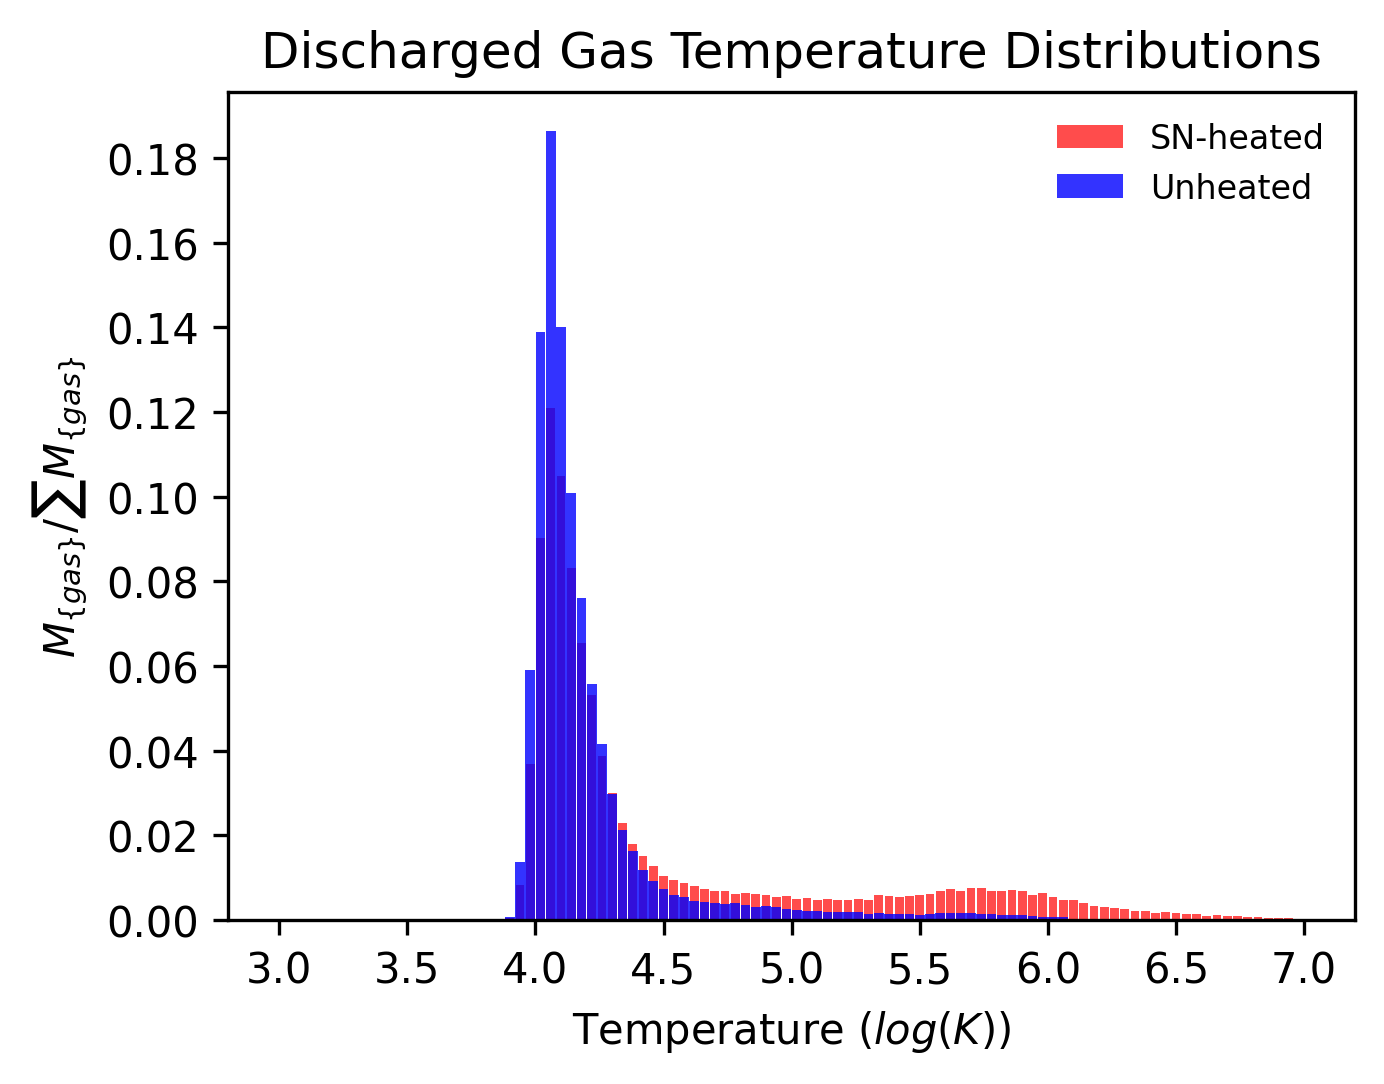

In [64]:
hot = discharged[discharged.snHeated==True]
cold = discharged[discharged.snHeated==False]


# exit angle histograms for all discharged and hot discharged gas.
bins = 100
plt.figure(dpi=300, figsize=(4.5,3.5), constrained_layout=True)

plt.hist(np.log10(hot.temp), bins=bins, weights=wt(hot), color='red', alpha=0.7,
         rwidth=.85, label='SN-heated', range=(3,7))
plt.hist(np.log10(cold.temp), bins=bins, weights=wt(cold),
         color='blue', alpha=0.8, rwidth=0.95, label='Unheated', range=(3,7))

plt.xlabel('Temperature ($log(K)$)')
plt.ylabel('$M_{\{gas\}} / \sum M_{\{gas\}}$')
plt.title('Discharged Gas Temperature Distributions')

plt.legend(frameon=False, fontsize='8')

# plt.xlim(7,13)
# plt.ylim(0,0.055)
plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=10)

plt.show()

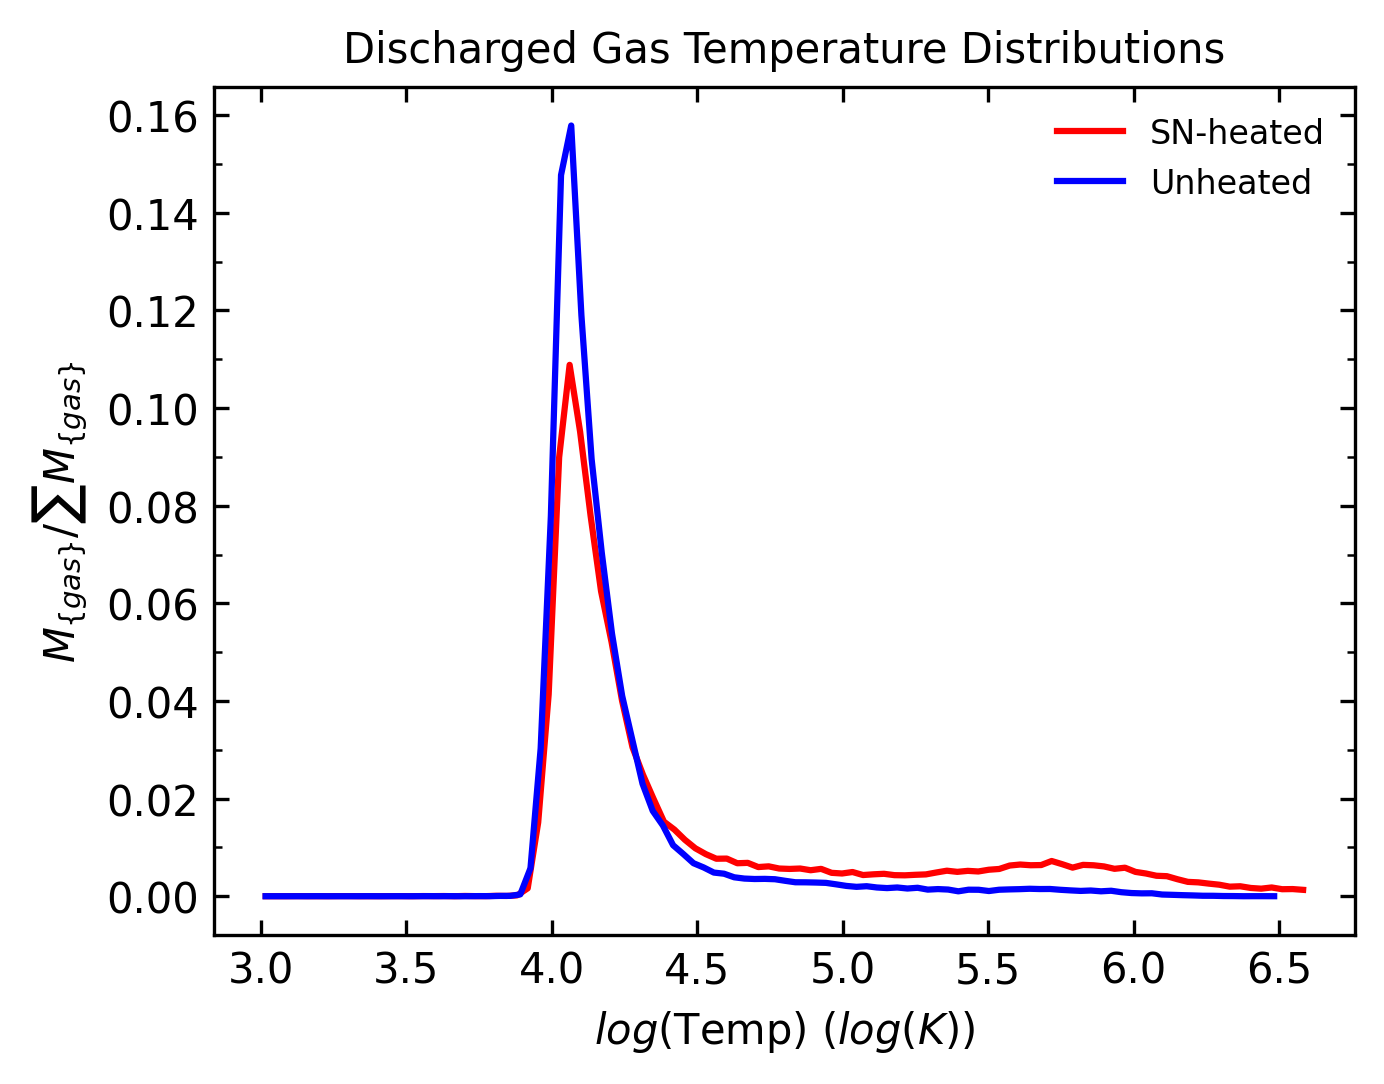

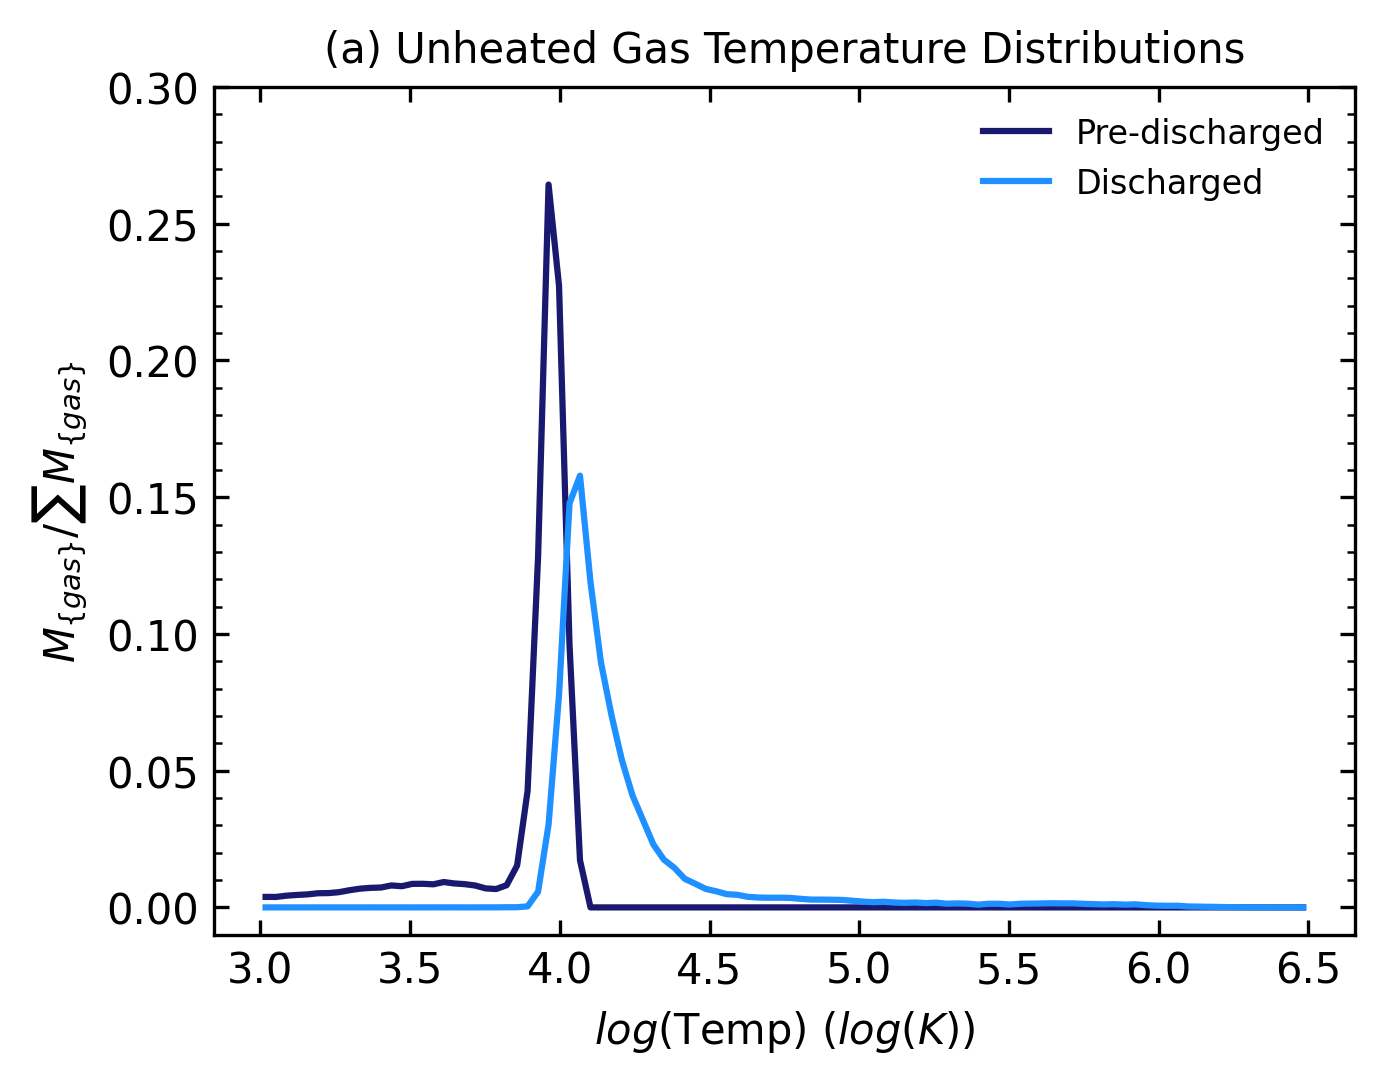

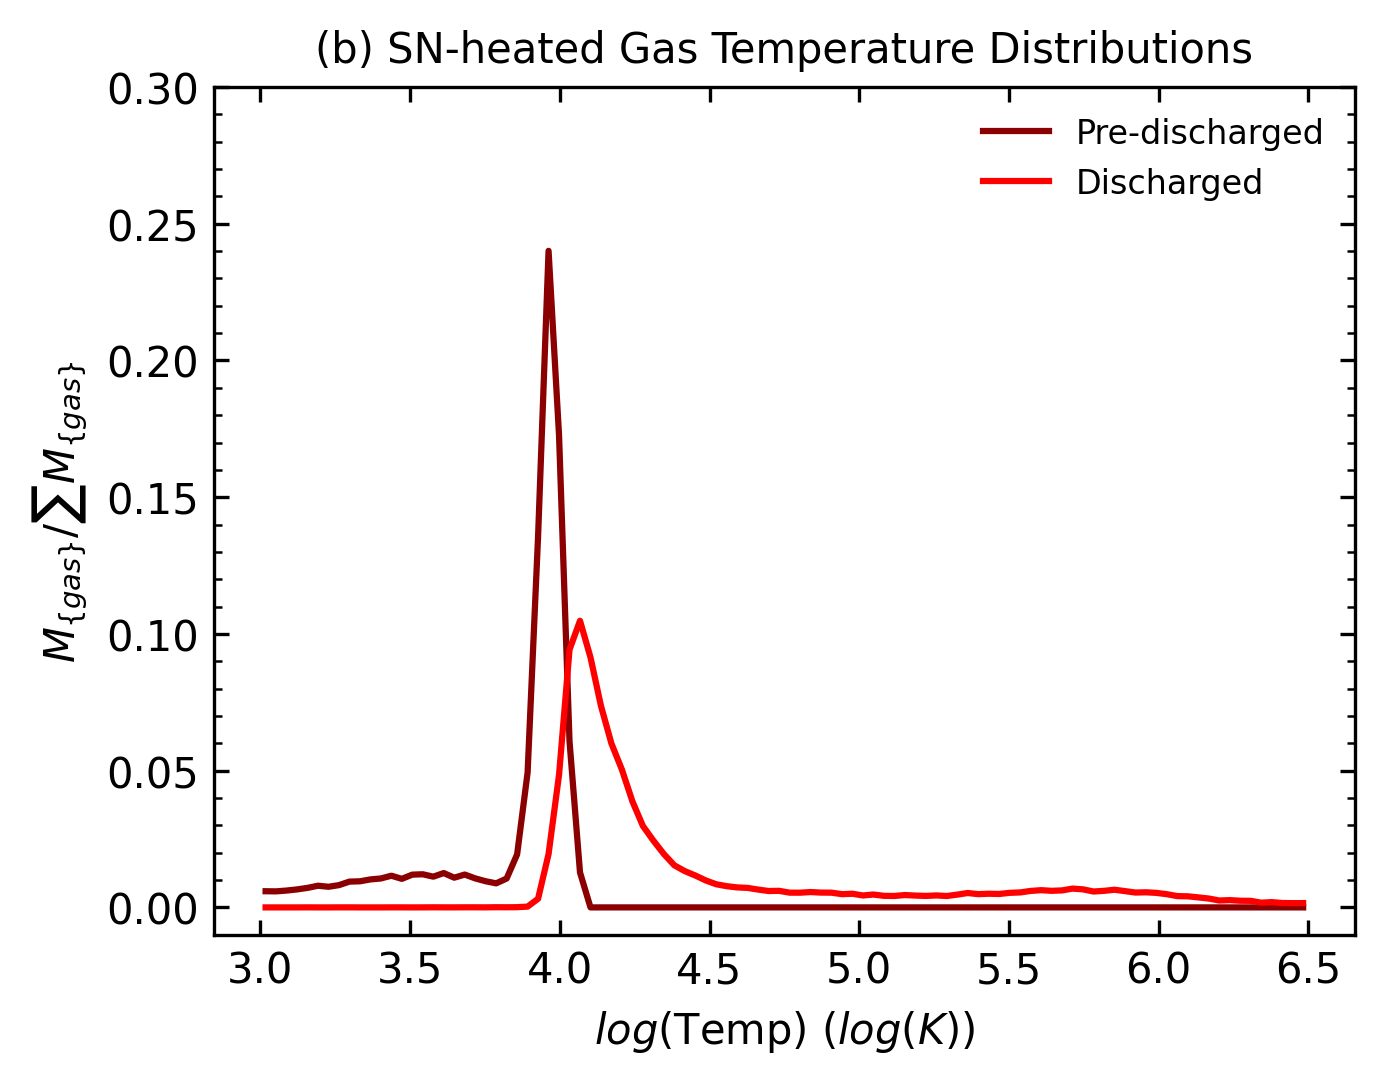

In [13]:
##### plotting discharged vs. heated gas #####
bins = 100
fig, ax = plt.subplots(1,1,dpi=300, figsize=(4.5,3.5), constrained_layout=True)

y1, x = np.histogram(np.log10(hot.temp), bins=bins, weights=wt(hot), range=(3.0,6.6))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='SN-heated', c='r')

y2, x = np.histogram(np.log10(cold.temp), bins=bins, weights=wt(cold), range=(3.0,6.5))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y2, label='Unheated', c='b')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('Discharged Gas Temperature Distributions', fontsize='medium')
ax.set_xlabel(r'$log$(Temp) ($log(K)$)')
ax.set_ylabel('$M_{\{gas\}} / \sum M_{\{gas\}}$')

# ax.set_xlim(3,8)
# ax.set_ylim(-0.01,0.30)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)

plt.savefig('F21plots/T_dist1.pdf')



##### plotting unheated discharged vs. pre-discharged gas #####
fig, ax = plt.subplots(1,1,dpi=300, figsize=(4.5,3.5), constrained_layout=True)

y1, x = np.histogram(np.log10(predischarged.temp), bins=bins, weights=wt(predischarged),
                     range=(3,6.5))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Pre-discharged', c='midnightblue')

y1, x = np.histogram(np.log10(cold.temp), bins=bins, weights=wt(cold), range=(3,6.5))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Discharged', c='dodgerblue')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('(a) Unheated Gas Temperature Distributions', fontsize='medium')
ax.set_xlabel(r'$log$(Temp) ($log(K)$)')
ax.set_ylabel('$M_{\{gas\}} / \sum M_{\{gas\}}$')

# ax.set_xlim(2,7)
ax.set_ylim(-0.01,0.3)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))

ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)

plt.savefig('F21plots/T_dist2.pdf')



##### plotting pre-discharge heated vs. heated gas #####
# bins = 100
fig, ax = plt.subplots(1,1,dpi=300, figsize=(4.5,3.5), constrained_layout=True)

y1, x = np.histogram(np.log10(hot_predischarged.temp), bins=bins,
                     weights=wt(hot_predischarged), range=(3,6.5))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Pre-discharged', c='darkred')

y1, x = np.histogram(np.log10(hot.temp), bins=bins, weights=wt(hot), range=(3,6.5))
bincenters = 0.5*(x[1:] + x[:-1])
ax.plot(bincenters, y1, label='Discharged', c='r')


# labels, axis scaling, etc.
ax.legend(frameon=False, fontsize='8')

ax.set_title('(b) SN-heated Gas Temperature Distributions', fontsize='medium')
ax.set_xlabel(r'$log$(Temp) ($log(K)$)')
ax.set_ylabel('$M_{\{gas\}} / \sum M_{\{gas\}}$')
# ax.set_xlim(2,8)
ax.set_ylim(-0.01,0.3)

ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.01))
ax.ticklabel_format(axis="y", style="plain",scilimits=(0,0))
ax.tick_params(direction='in',which='both',right=True,top=True)

plt.savefig('F21plots/T_dist3.pdf')
plt.show()

### Code Testing <a class="anchor" id="proving"></a>

Testing out different data types and computations.